# **Logistic Regression**

*   Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. 
*  It is used for predicting the categorical dependent variable using a given set of independent variables.
*   Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.


## Implementing Logistic Regression on HR dataset

This is dataset about based on some attributes a employee will leave company or retain in company 


### Attribute Information:

* satisfaction_level = is employee is satisfied with company or not
* last_evaluation = how was employee last evaluted
* number_project = how many projects employee done
* average_montly_hours = how much time employee work in month
* time_spend_company = how much time employee spended in company
* Work_accident = there is any work accident happend
* left = how much employee levaes company
* promotion_last_5years = had promotion in last 5 years
* Department = which department employee works in
* salary = employee salary

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline

**Q1 . Why you want to apply regression on selected dataset? Discuss full story behind dataset.**
* This is data about employee will stay in company or not and this is classification problem that the employee will retain in compnany or not that's why i want to apply logistic regression on this dataset.

### Import Dataset

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

Q. How many total observations are in data?
* Here we can see we have 15000 observations with 10 column in each row.


In [4]:
df.isnull().sum() # checking for is there a null value or not in our data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Data exploration and visualization

In [5]:
left = df[df.left==1]
left.shape

(3571, 10)

In [6]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [7]:
#Average numbers for all columns

df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

* **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
* **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
* **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

#### Impact of salary on employee retention

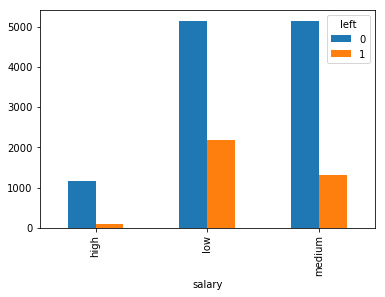

In [9]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

# bar chart shows employees with high salaries are likely to not leave the company

##### Department wise employee retention rate

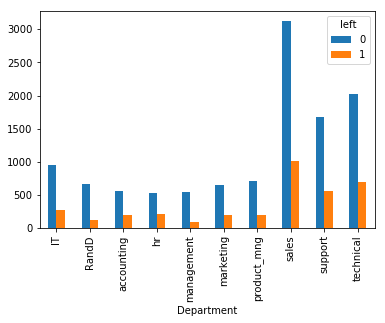

In [10]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

# From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis 

###### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
* **Satisfaction Level**
* **Average Monthly Hours**
* **Promotion Last 5 Years**
* **Salary**

In [11]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


##### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [12]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [13]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [14]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [15]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [16]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [17]:
y = df.left

In [19]:
subdf.describe()

,satisfaction_level,average_montly_hours,promotion_last_5years
count,14999.000000,14999.000000,14999.000000
mean,0.612834,201.050337,0.021268
std,0.248631,49.943099,0.144281
min,0.090000,96.000000,0.000000
25%,0.440000,156.000000,0.000000
50%,0.640000,200.000000,0.000000
75%,0.820000,245.000000,0.000000
max,1.000000,310.000000,1.000000


### split the datasets into training set and test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Train the model on training set

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict the test data on results

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Evalute the model

In [28]:
model.score(X_test,y_test)

0.7726666666666666

In [34]:
from sklearn.metrics import accuracy_score
predic = model.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predic)

0.7726666666666666

In [40]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix (y_test, predic))

[[3185  221]
 [ 802  292]]
